# Task 3: Implementing Inter-Annotator Agreement

### Team 31
### Vansh Kumar 23110351
### Aditya Jain 23110016

In [19]:
# Importing required libraries
import pandas as pd # To work with the csv files by converting them to Dataframes
import numpy as np

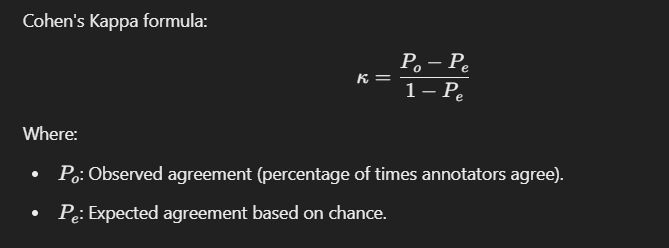

In [16]:
def cohens_kappa(file1, file2):
    df1 = pd.read_csv(file1)  # Read the first annotation file
    df2 = pd.read_csv(file2)  # Read the second annotation file

    labels1 = df1["ner_label"].tolist()  # List of 'ner_label' labels from the first annotator
    labels2 = df2["ner_label"].tolist()  # List of 'ner_label' labels from the second annotator

    if len(labels1) != len(labels2): # Check if both lists have the same length or not
        print("The annotations do not match in length!")
        return None # return None and end the function

    # Calculate observed agreement (P_o)
    matches = 0
    for i in range(len(labels1)):
        if labels1[i] == labels2[i]:  # Check if the labels are the same
            matches += 1
    observed_agreement = matches / len(labels1)



    unique_labels = set(labels1 + labels2) # find all unique labels across both annotators

    # Calculate the frequency of each label in both annotations
    label_frequencies = {}
    for label in unique_labels:
        freq1 = labels1.count(label)  # Count in annotator first teammate's labels
        freq2 = labels2.count(label)  # Count in annotator second teammate's labels
        average_freq = (freq1 + freq2) / (2 * len(labels1))  # finding avg frequency
        label_frequencies[label] = average_freq

    # Calculate expected agreement (P_e)
    expected_agreement = 0
    for label, freq in label_frequencies.items():
        expected_agreement += freq ** 2

    # Calculate Cohen's Kappa
    kappa = (observed_agreement - expected_agreement) / (1 - expected_agreement) 

    return kappa

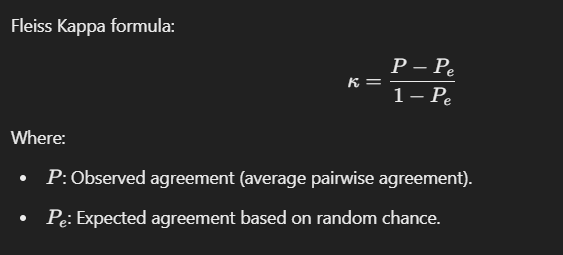

In [17]:
def fleiss_kappa(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file)  # Reading the csv files
        dfs.append(df)  # Add to list of dataframes

    class_mapping = {"Trucks": 0, "No Trucks": 1} # Mapping the Trucks/No Trucks classification to integers (0/1)
    classifications = []
    for df in dfs:
        mapped_labels = df["classification"].map(class_mapping).tolist()  # Converting labels to int
        classifications.append(mapped_labels)

    # Making Fleiss Kappa matrix
    num_classes = len(class_mapping)  # Two classes: Trucks and No Trucks
    num_samples = len(classifications[0])  # Total no. of images
    fleiss_matrix = np.zeros((num_samples, num_classes))  # Creating a matrix with zeros

    for i in range(num_samples):  # Iterate over each image
        for j in range(len(classifications)):  # Iterate over annotators
            label = classifications[j][i]  # Geting label for this annotator and image
            fleiss_matrix[i][label] += 1  # Increasing count for this label

    # Calculating observed agreement (P) value
    total_votes = np.sum(fleiss_matrix, axis=1)  # Sum of votes per image
    observed_agreements = []  # To store P[i] values for each image
    for i in range(len(fleiss_matrix)):  # Iterate over each row (image) in the matrix
        row = fleiss_matrix[i]
        agreement = np.sum((row ** 2 - row) / (total_votes[i] * (total_votes[i] - 1)))
        observed_agreements.append(agreement)
    P = np.mean(observed_agreements)  # finding avg agreement across all images

    # Calculating expected agreement (P_e)
    total_annotations = np.sum(fleiss_matrix)  # Total annotations across all images
    class_totals = np.sum(fleiss_matrix, axis=0)  # Total votes for each class
    expected_agreement = []  # To store P[j] values
    for count in class_totals:
        proportion = count / total_annotations  # Proportion of votes for this class
        expected_agreement.append(proportion ** 2)
    P_e = np.sum(expected_agreement)  # Sum of squares of proportions

    # Calculate Fleiss Kappa
    kappa = (P - P_e) / (1 - P_e)

    return kappa

In [18]:
nlp_file1 = "./Annotations/NLP/Vansh_Annotations_NLP.csv" # NLP Annotations of first teammate
nlp_file2 = "./Annotations/NLP/Aditya_Annotations_NLP.csv" # NLP Annotations of Seconnd teammate
cv_files = [
    "./Annotations/CV/Vansh_Annotations_CV.csv", # CV Annotations of First teammate
    "./Annotations/CV/Aditya_Annotations_CV.csv", # CV Annotations of Seconnd teammate
    "./Annotations/CV/Soham_Annotations_CV.csv" # CV Annotations of other team's student
            ]
    
cohens_kappa = cohens_kappa(nlp_file1, nlp_file2) # calling Cohens Kappa function
print("Cohen's Kappa for NLP Dataset: ",round(cohens_kappa, 3)) # printing Cohens Kappa
    
fleiss_kappa_score = fleiss_kappa(cv_files) # calling Fleiss Kappa function
print("Fleiss Kappa for CV Dataset: ",fleiss_kappa_score) # printing Fleiss Kappa

Cohen's Kappa for NLP Dataset:  0.895
Fleiss Kappa for CV Dataset:  0.55


# Summary of Kappa Scores for NLP and CV Datasets

## **Cohen's Kappa for NLP Dataset: 0.895**
  - A score of **0.895** shows **almost perfect agreement** between both of us teammates.
  - Both of us were highly consistent in our annotations for the NLP dataset.

---

## **Fleiss Kappa for CV Dataset: 0.55**
  - We have taken Classification for the CV dataset from Soham Shrivastava (23110315) from Group 22.
  - A score of **0.55** falls into the **moderate agreement** range (between 0.41 and 0.60).
  - This shows some agreement between us three annotaters (Vansh, Aditya, and Soham), but there were inconsistencies also.
  - Differences in judgmentleeds to disagreements in classifying images as "Trucks" or "No Trucks."

---

